In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [54]:
df = pd.read_csv("Marketing Insight.csv")
df

,id,year,assets,debt,earnings,cashflow,sales,mv,ad,rd,fv,mkt,sector
0,2,1991,34.150,12.901,6.133,-4.760,40.661,93.641594,0.848000,1.94200,2.556972,13.551000,1
1,2,1992,100.190,73.684,5.239,5.642,54.998,63.700230,0.880000,2.46900,1.125155,20.593000,1
2,2,1993,89.988,73.488,13.044,7.724,69.560,49.590862,1.168000,4.79100,1.165176,26.938999,1
3,2,1994,89.778,72.782,13.605,6.720,68.097,53.476501,1.503000,4.78300,1.190308,24.464001,1
4,3,1990,6.130,1.790,0.796,0.805,7.388,1.752816,0.009000,0.20600,0.536348,1.611000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29884,4756,2015,8092.460,2040.375,-294.039,-524.499,4046.025,31543.314000,58.299999,717.90002,4.153050,863.932010,1
29885,4756,2016,22664.076,6053.860,301.459,-123.829,7000.132,34523.969000,48.000000,834.40802,1.771307,1362.489000,1
29886,4756,2017,28655.372,9486.248,70.917,-60.654,11758.751,52554.945000,66.500000,1378.07300,2.203613,2343.000000,1
29887,4756,2018,29739.614,9454.055,1634.946,2097.802,21461.268,57442.277000,70.000000,1473.63400,2.306088,2751.227100,1


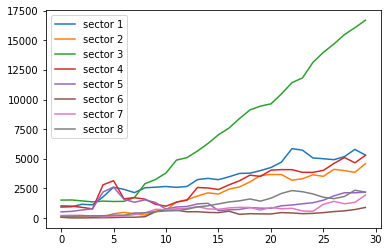

In [30]:
for i in range(1,9):
    data = df[df["sector"] == i]
    means = []
    for j in range(1990, 2020):
        year_data = data[data["year"] == j]["sales"]
        means.append(np.mean(year_data))
    plt.plot(means, label = f"sector {i}")
    plt.legend()

In [91]:
data = df[df["sector"] == 1]
X, y = df.iloc[:, :6].join(df.iloc[:, 7:]), df["sales"]

In [106]:
results = sm.OLS(y, X[["assets","debt","cashflow","mv","rd","mkt"]]).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  sales   R-squared (uncentered):                   0.914
Model:                            OLS   Adj. R-squared (uncentered):              0.914
Method:                 Least Squares   F-statistic:                          2.820e+04
Date:                Thu, 18 Nov 2021   Prob (F-statistic):                        0.00
Time:                        10:50:15   Log-Likelihood:                     -1.5425e+05
No. Observations:               15844   AIC:                                  3.085e+05
Df Residuals:                   15838   BIC:                                  3.085e+05
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
assets         0.6513      0.006    102.846      0.000       0.639       0.664
debt          -0.4834      0.019    -25.004      0.000      -0.521      -0.446
cashflow       1.5392      0.046     33.345      0.000       1.449       1.630
mv            -0.1181      0.003    -34.573      0.000      -0.125      -0.111
rd            -1.3941      0.071    -19.687      0.000      -1.533      -1.255
mkt            1.6700      0.031     53.539      0.000       1.609       1.731
==============================================================================
Omnibus:                    19195.834   Durbin-Watson:                   0.344
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         36881309.027
Skew:                           5.525   Prob(JB):                         0.00
Kurtosis:                     239.103   Cond. No.                         64.7
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""